# Correlation and Cointegration Analysis for EUR/USD and GBP/USD

In this notebook, we will calculate and analyze the correlation and cointegration between the EUR/USD and GBP/USD currency pairs. This analysis helps to understand the relationship and long-term equilibrium between these two major forex pairs, which can be valuable for trading strategies and risk management.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read Forex Data


In [37]:
column_names = ['datetime', 'open', 'high', 'low', 'close', 'volume']
df_eur = pd.read_csv('EURUSD1440.csv', sep='\t', names=column_names, parse_dates=['datetime'], index_col='datetime')
df_gbp= pd.read_csv('GBPUSD1440.csv', sep='\t', names=column_names, parse_dates=['datetime'], index_col='datetime')

In [38]:
df_eur

,open,high,low,close,volume
datetime,,,,,
2009-06-03,1.42030,1.42310,1.41085,1.41420,394952
2009-06-04,1.41415,1.42410,1.40700,1.41675,956402
2009-06-05,1.41675,1.42675,1.39325,1.39650,746305
2009-06-07,1.39680,1.39770,1.39268,1.39745,19136
2009-06-08,1.39745,1.40020,1.38050,1.39285,829437
...,...,...,...,...,...
2025-06-09,1.14063,1.14391,1.13864,1.14261,98869
2025-06-10,1.14260,1.14475,1.13729,1.14372,114622
2025-06-11,1.14375,1.15129,1.14052,1.15099,107094


In [39]:
df_gbp

,open,high,low,close,volume
datetime,,,,,
2009-06-03,1.66115,1.66630,1.62420,1.62965,487827
2009-06-04,1.62965,1.64345,1.60835,1.61130,414519
2009-06-05,1.61100,1.62425,1.59390,1.59795,320384
2009-06-07,1.59544,1.59750,1.59335,1.59695,4961
2009-06-08,1.59695,1.61035,1.58020,1.60875,331015
...,...,...,...,...,...
2025-06-09,1.35369,1.35810,1.35242,1.35542,80136
2025-06-10,1.35541,1.35639,1.34560,1.35071,73672
2025-06-11,1.35073,1.35724,1.34639,1.35673,75729


Plot EUR and GBP graph :)

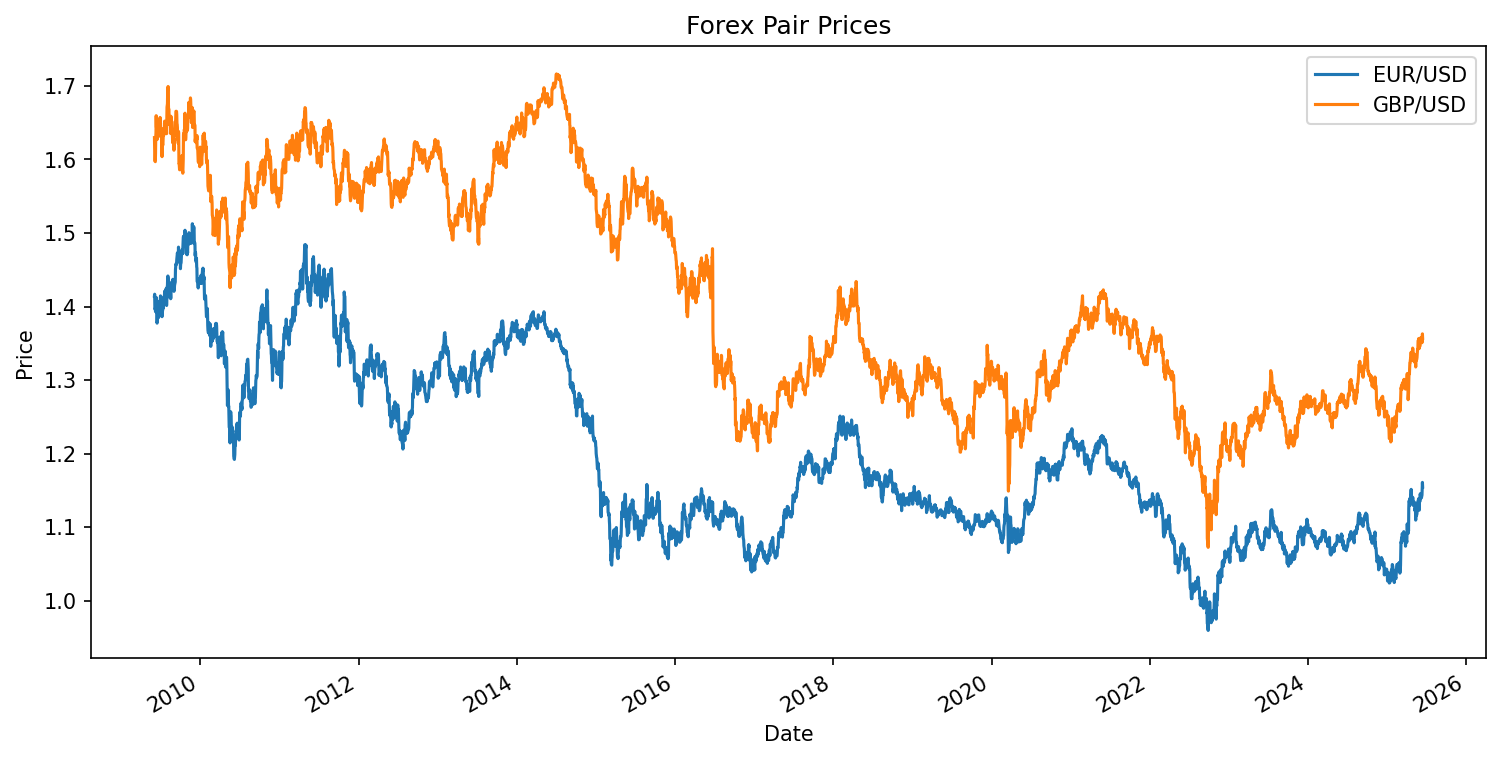

In [41]:
plt.figure(dpi=150)
df_eur['close'].plot(label='EUR/USD', figsize=(12, 6))
df_gbp['close'].plot(label='GBP/USD', figsize=(12, 6))
plt.title('Forex Pair Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Correlation
next we willl find correlation of this 2 pair

In [43]:
correlation = df_eur['close'].corr(df_gbp['close'])
string = ""
if(correlation > 0.7 and correlation <= 1):
    string = "high"
elif(correlation > 0.3 and correlation <= 0.7):
    string = "medium"
else: string = "low"

print(f"Correlation between EUR/USD and GBP/USD: {correlation:.4f} ({string})")

Correlation between EUR/USD and GBP/USD: 0.8662 (high)


# Cointegration
next we will find cointegration of this 2 pair

In [44]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

In [47]:
combine = pd.concat([df_gbp,df_eur],axis=1)
# Make sure to rename columns rather than just all "adjusted close"
combine.columns = ['GBP/USD_close','GBP/USD_open','GBP/USD_high','GBP/USD_low','GBP/USD_volume',
                   'EUR/USD_close','EUR/USD_open','EUR/USD_high','EUR/USD_low','EUR/USD_volume']
combine.dropna()

,GBP/USD_close,GBP/USD_open,GBP/USD_high,GBP/USD_low,GBP/USD_volume,EUR/USD_close,EUR/USD_open,EUR/USD_high,EUR/USD_low,EUR/USD_volume
datetime,,,,,,,,,,
2009-06-03,1.66115,1.66630,1.62420,1.62965,487827.0,1.42030,1.42310,1.41085,1.41420,394952
2009-06-04,1.62965,1.64345,1.60835,1.61130,414519.0,1.41415,1.42410,1.40700,1.41675,956402
2009-06-05,1.61100,1.62425,1.59390,1.59795,320384.0,1.41675,1.42675,1.39325,1.39650,746305
2009-06-07,1.59544,1.59750,1.59335,1.59695,4961.0,1.39680,1.39770,1.39268,1.39745,19136
2009-06-08,1.59695,1.61035,1.58020,1.60875,331015.0,1.39745,1.40020,1.38050,1.39285,829437
...,...,...,...,...,...,...,...,...,...,...
2025-06-09,1.35369,1.35810,1.35242,1.35542,80136.0,1.14063,1.14391,1.13864,1.14261,98869
2025-06-10,1.35541,1.35639,1.34560,1.35071,73672.0,1.14260,1.14475,1.13729,1.14372,114622
2025-06-11,1.35073,1.35724,1.34639,1.35673,75729.0,1.14375,1.15129,1.14052,1.15099,107094


In [51]:
# ลบแถวที่มี NaN ในสอง series ที่เราสนใจ
combine_clean = combine[['EUR/USD_close', 'GBP/USD_close']].dropna()

# ทดสอบ cointegration
coint_t, p_value, critical_values = coint(combine_clean['EUR/USD_close'], combine_clean['GBP/USD_close'])

# แสดงผลลัพธ์
print("Cointegration Test Statistic:", coint_t)
print("P-value:", p_value)
print("Critical Values:", critical_values)

if p_value < 0.05:  # สมมติใช้ระดับนัยสำคัญ 5%
    print("Series มี Cointegration")
else:
    print("Series ไม่มี Cointegration")


Cointegration Test Statistic: -2.784299568118582
P-value: 0.17073137651705472
Critical Values: [-3.89862647 -3.33734937 -3.04529632]
Series ไม่มี Cointegration
